In [1]:
import pandas as pd
import ast
from scipy.spatial import distance
import seaborn as sns
from bamt.networks.continuous_bn import ContinuousBN
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import json
from golem.core.optimisers.genetic.operators.inheritance import GeneticSchemeTypesEnum
from golem.core.optimisers.adaptive.operator_agent import MutationAgentTypeEnum
from golem.visualisation.opt_history.multiple_fitness_line import MultipleFitnessLines
from golem.core.optimisers.opt_history_objects.opt_history import OptHistory

c:\Users\anaxa\anaconda3\envs\icebnpredict\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Сравнение по разных целевым значениям


In [13]:
data = pd.read_csv('examples/BN_generator_learning/results/paper_cec/4 20 0.05 0.9 high GeneticSchemeTypesEnum.parameter_free MutationAgentTypeEnum.default exp3.csv')
data = data.loc[data['Sheme'] == 'GeneticSchemeTypesEnum.steady_state']
data.reset_index(inplace=True, drop=True)

In [14]:
for i in data.index:
    origin_corr = ast.literal_eval(data.loc[i,'Target correlation'])
    calculated_corr = ast.literal_eval(data.loc[i,'Calculated_corr'])
    data.loc[i, 'Corr distance'] = distance.euclidean(origin_corr, calculated_corr)

In [6]:
data

,Number of atr,P_edge,Target assort,Target correlation,Calculated_corr,Time,Deviation_assort,Corr_type,Sheme,Mutation,Corr distance
0,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[-0.23670404496397307, -0.08977152478209803, 0...",69,0.0,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.950868
1,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.05792100993203553, -0.307258743746652, 0.06...",69,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.490698
2,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.05236460055856745, 0.028197805458886442, 0....",69,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.167920
3,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.12836260015074163, 0.09410010697486772, 0.1...",69,0.2,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.120057
4,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.11704665380992599, 0.33519156003081535, -0....",69,0.5,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.210089
...,...,...,...,...,...,...,...,...,...,...,...
233,20,0.05,0.9,"[0.29059082841780665, 0.24299780265876386, 0.2...","[0.019960345248839127, 0.16131139199872768, -0...",81,0.4,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,1.518550
234,20,0.05,0.9,"[0.29059082841780665, 0.24299780265876386, 0.2...","[-0.012137821529088221, 0.19253415585530842, -...",81,0.5,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,1.360559
235,20,0.05,0.2,"[0.8776936295352368, 0.7962450251555535, 0.754...","[-0.028756150185013395, 0.15388613925786176, -...",197,0.1,high,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,2.695708
236,20,0.05,0.2,"[0.8776936295352368, 0.7962450251555535, 0.754...","[0.09064731375302099, -0.03595571659298453, -0...",197,0.2,high,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,2.619025


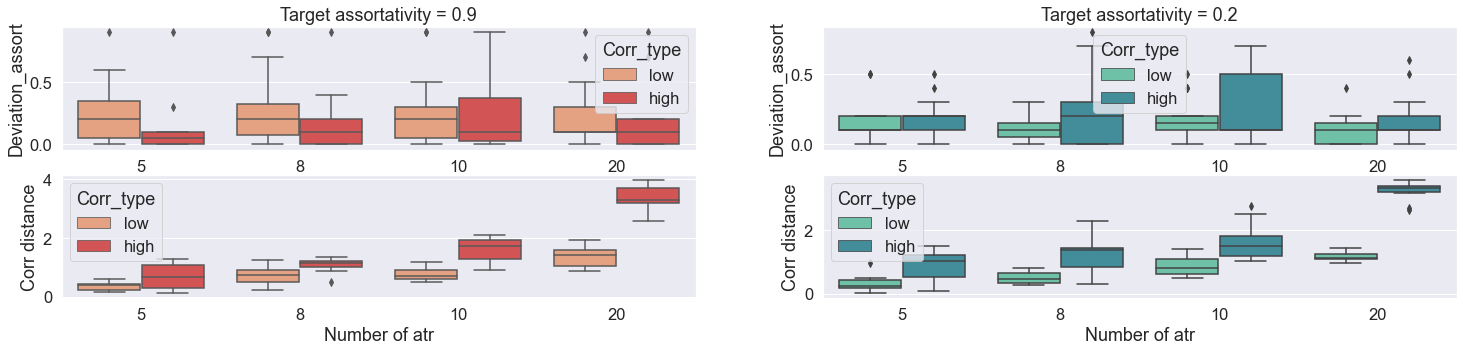

In [19]:
target_assort = [0.2, 0.9]
target_corr = ['low', 'high']
df_high = data.loc[data['Target assort'] == 0.9]
df_low = data.loc[data['Target assort'] == 0.2]
sns.set(font_scale=1.5)
palette = sns.color_palette("rocket_r", 4)
fig, ax = plt.subplots(2,2, figsize=(25,5))
ax[0,0].set_title('Target assortativity = '+str(0.9))
sns.boxplot(ax=ax[0,0], x='Number of atr', y='Deviation_assort', hue='Corr_type', data=df_high, palette=palette)
sns.boxplot(ax=ax[1,0], x='Number of atr', y='Corr distance', hue='Corr_type', data=df_high, palette=palette)
palette = sns.color_palette("mako_r", 4)
ax[0,1].set_title('Target assortativity = '+str(0.2))
sns.boxplot(ax=ax[0,1], x='Number of atr', y='Deviation_assort', hue='Corr_type', data=df_low, palette=palette)
sns.boxplot(ax=ax[1,1], x='Number of atr', y='Corr distance', hue='Corr_type', data=df_low, palette=palette)
fig.savefig('full_atr.pdf')

Сравнение обучения с кроссоверами и только на мутациях

In [2]:
data1 = pd.read_csv('examples/BN_generator_learning/results/paper_cec/4 20 0.05 0.9 high GeneticSchemeTypesEnum.parameter_free MutationAgentTypeEnum.default exp3.csv')
data2 = pd.read_csv('examples/BN_generator_learning/results/paper_cec/3 5 0.05 0.2 low GeneticSchemeTypesEnum.steady_state MutationAgentTypeEnum.default exp4.csv')

In [3]:
data1 = data1.loc[data1['Sheme'] == 'GeneticSchemeTypesEnum.steady_state']
data1.reset_index(inplace=True, drop=True)
data1

,Number of atr,P_edge,Target assort,Target correlation,Calculated_corr,Time,Deviation_assort,Corr_type,Sheme,Mutation
0,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[-0.23670404496397307, -0.08977152478209803, 0...",69,0.0,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
1,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.05792100993203553, -0.307258743746652, 0.06...",69,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
2,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.05236460055856745, 0.028197805458886442, 0....",69,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
3,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.12836260015074163, 0.09410010697486772, 0.1...",69,0.2,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
4,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.11704665380992599, 0.33519156003081535, -0....",69,0.5,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
...,...,...,...,...,...,...,...,...,...,...
233,20,0.05,0.9,"[0.29059082841780665, 0.24299780265876386, 0.2...","[0.019960345248839127, 0.16131139199872768, -0...",81,0.4,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
234,20,0.05,0.9,"[0.29059082841780665, 0.24299780265876386, 0.2...","[-0.012137821529088221, 0.19253415585530842, -...",81,0.5,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
235,20,0.05,0.2,"[0.8776936295352368, 0.7962450251555535, 0.754...","[-0.028756150185013395, 0.15388613925786176, -...",197,0.1,high,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
236,20,0.05,0.2,"[0.8776936295352368, 0.7962450251555535, 0.754...","[0.09064731375302099, -0.03595571659298453, -0...",197,0.2,high,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default


In [4]:
for i in data1.index:
    origin_corr = ast.literal_eval(data1.loc[i,'Target correlation'])
    calculated_corr = ast.literal_eval(data1.loc[i,'Calculated_corr'])
    data1.loc[i, 'Corr distance'] = distance.euclidean(origin_corr, calculated_corr)
    

In [5]:
for i in data2.index:
    origin_corr = ast.literal_eval(data2.loc[i,'Target correlation'])
    calculated_corr = ast.literal_eval(data2.loc[i,'Calculated_corr'])
    data2.loc[i, 'Corr distance'] = distance.euclidean(origin_corr, calculated_corr)

In [6]:
data1['Only mutation'] = ['False']*data1.shape[0]

In [7]:
data2['Only mutation'] = ['True']*data2.shape[0]

In [8]:
final_df = pd.concat([data1, data2])
final_df.reset_index(inplace=True, drop=True)
final_df

,Number of atr,P_edge,Target assort,Target correlation,Calculated_corr,Time,Deviation_assort,Corr_type,Sheme,Mutation,Corr distance,Only mutation
0,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[-0.23670404496397307, -0.08977152478209803, 0...",69,0.0,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.950868,False
1,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.05792100993203553, -0.307258743746652, 0.06...",69,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.490698,False
2,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.05236460055856745, 0.028197805458886442, 0....",69,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.167920,False
3,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.12836260015074163, 0.09410010697486772, 0.1...",69,0.2,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.120057,False
4,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.11704665380992599, 0.33519156003081535, -0....",69,0.5,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.210089,False
...,...,...,...,...,...,...,...,...,...,...,...,...
368,20,0.05,0.2,"[0.7748691024848446, 0.76200393430237, 0.73823...","[-0.08102123618566874, 0.7061878712049523, -0....",295,0.0,high,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,2.901965,True
369,20,0.05,0.9,"[0.7748691024848446, 0.76200393430237, 0.73823...","[-0.21088510398851024, 0.7847053826042515, -0....",166,0.0,high,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,3.221473,True
370,5,0.05,0.2,"[0.00034078167093397614, 0.06080595423154118, ...","[0.20249192747031672, -0.6375072899018199, 0.0...",78,0.0,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.747372,True
371,5,0.05,0.2,"[0.00034078167093397614, 0.06080595423154118, ...","[0.11817104109133564, -0.25878933026405443, -0...",78,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.624995,True


<AxesSubplot: xlabel='Number of atr', ylabel='Deviation_assort'>

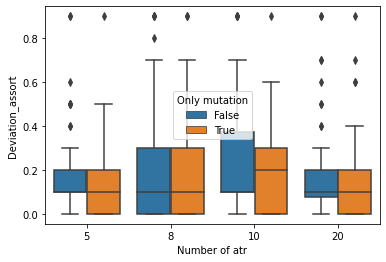

In [9]:
sns.boxplot(x='Number of atr', y='Deviation_assort', hue='Only mutation', data=final_df)

<AxesSubplot: xlabel='Number of atr', ylabel='Corr distance'>

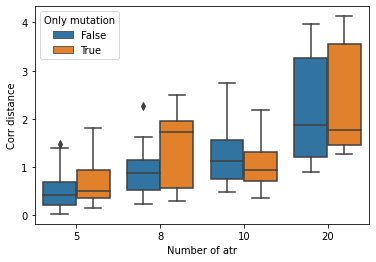

In [10]:
sns.boxplot(x='Number of atr', y='Corr distance', hue='Only mutation', data=final_df)

In [13]:

number_of_atr = [5, 8, 10, 20]
p_edge = [0.05]
target_assort = [0.2, 0.9]
corr = ['low', 'high']
mutation_types = [MutationAgentTypeEnum.default]
schemes = [GeneticSchemeTypesEnum.steady_state]
for mut in mutation_types:
    for schem in schemes:
        for n in number_of_atr:
            history1 = []
            history2 = []
            for cor in corr:
                for target in target_assort:
                    for _ in range(5):
                        dict1 = OptHistory.load('examples/BN_generator_learning/results/paper_cec/'+str(_)+' '+str(n)+' '+str(0.05)+' '+str(target)+' '+cor+' '+str(schem)+' '+str(mut) + ' exp3_history.json')
                        history1.append(dict1)
                        try:
                            dict2 = OptHistory.load('examples/BN_generator_learning/results/paper_cec/'+str(_)+' '+str(n)+' '+str(0.05)+' '+str(target)+' '+cor+' '+str(schem)+' '+str(mut) + ' exp4_history.json')
                            history2.append(dict2)
                        except:
                            continue
                    fitn = MultipleFitnessLines.from_histories({'Mutations+Crossovers':history1, 'Only Mutations':history2})
                    fitn.visualize(metric_id=0, dpi=1000, save_path='examples/BN_generator_learning/results/paper_cec/'+str(n)+' '+str(0.05)+' compare_crossover_use_fig1.png')
                    fitn.visualize(metric_id=1, dpi=1000, save_path='examples/BN_generator_learning/results/paper_cec/'+str(n)+' '+str(0.05)+' compare_crossover_use_fig2.png')
                        

2024-01-26 16:02:16,821 | INFO     | arg_constraint_wrapper.py-outer-0075 | MultipleFitnessLines - Visualizing optimization history... It may take some time, depending on the history size.
2024-01-26 16:02:16,821 - MultipleFitnessLines - Visualizing optimization history... It may take some time, depending on the history size.
2024-01-26 16:02:18,184 | INFO     | utils.py-show_or_save_figure-0116 | default - The figure was saved to "d:\GOLEM\examples\BN_generator_learning\results\paper_cec\5 0.05 compare_crossover_use_fig1.png".
2024-01-26 16:02:18,184 - default - The figure was saved to "d:\GOLEM\examples\BN_generator_learning\results\paper_cec\5 0.05 compare_crossover_use_fig1.png".
2024-01-26 16:02:18,185 | INFO     | arg_constraint_wrapper.py-outer-0075 | MultipleFitnessLines - Visualizing optimization history... It may take some time, depending on the history size.
2024-01-26 16:02:18,185 - MultipleFitnessLines - Visualizing optimization history... It may take some time, depending 

Сравнение по генетическим схемам

In [2]:
data = pd.read_csv('examples/BN_generator_learning/results/paper_cec/4 20 0.05 0.9 high GeneticSchemeTypesEnum.parameter_free MutationAgentTypeEnum.default exp3.csv')
data

,Number of atr,P_edge,Target assort,Target correlation,Calculated_corr,Time,Deviation_assort,Corr_type,Sheme,Mutation
0,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[-0.23670404496397307, -0.08977152478209803, 0...",69,0.0,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
1,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.05792100993203553, -0.307258743746652, 0.06...",69,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
2,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.05236460055856745, 0.028197805458886442, 0....",69,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
3,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.12836260015074163, 0.09410010697486772, 0.1...",69,0.2,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
4,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.11704665380992599, 0.33519156003081535, -0....",69,0.5,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default
...,...,...,...,...,...,...,...,...,...,...
464,20,0.05,0.2,"[0.8524691627704841, 0.8335720523365792, 0.834...","[-0.6704513984279316, 0.030197731859211287, -0...",19,0.2,high,GeneticSchemeTypesEnum.parameter_free,MutationAgentTypeEnum.default
465,20,0.05,0.9,"[0.8524691627704841, 0.8335720523365792, 0.834...","[-0.6652166669927483, -0.08925017411823684, 0....",10,0.0,high,GeneticSchemeTypesEnum.parameter_free,MutationAgentTypeEnum.default
466,20,0.05,0.9,"[0.8524691627704841, 0.8335720523365792, 0.834...","[-0.6561871869866146, 0.09356747938446633, 0.6...",10,0.0,high,GeneticSchemeTypesEnum.parameter_free,MutationAgentTypeEnum.default
467,20,0.05,0.9,"[0.8524691627704841, 0.8335720523365792, 0.834...","[-0.6671357945124796, -0.0629072507035786, 0.6...",10,0.5,high,GeneticSchemeTypesEnum.parameter_free,MutationAgentTypeEnum.default


In [3]:
for i in data.index:
    origin_corr = ast.literal_eval(data.loc[i,'Target correlation'])
    calculated_corr = ast.literal_eval(data.loc[i,'Calculated_corr'])
    data.loc[i, 'Corr distance'] = distance.euclidean(origin_corr, calculated_corr)

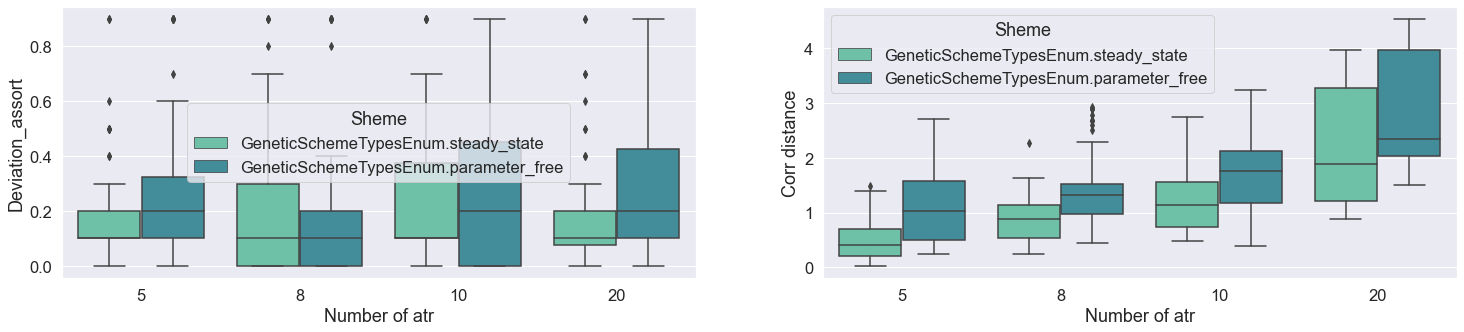

In [25]:
sns.set(font_scale=1.5)
palette = sns.color_palette("mako_r", 4)
fig, ax = plt.subplots(1,2, figsize=(25,5))
sns.boxplot(ax=ax[0], x='Number of atr', y='Deviation_assort', hue='Sheme', data=data, palette=palette)
sns.boxplot(ax=ax[1], x='Number of atr', y='Corr distance', hue='Sheme', data=data, palette=palette)
fig.savefig('schemes_quality.pdf')


<AxesSubplot: xlabel='Number of atr', ylabel='Deviation_assort'>

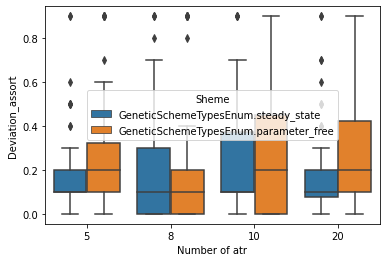

In [16]:
sns.boxplot(x='Number of atr', y='Deviation_assort', hue='Sheme', data=data)

<AxesSubplot: xlabel='Number of atr', ylabel='Corr distance'>

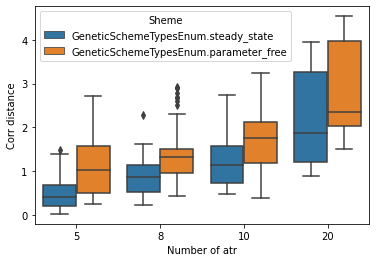

In [17]:
sns.boxplot(x='Number of atr', y='Corr distance', hue='Sheme', data=data)

In [4]:
number_of_atr = [5, 8, 10, 20]
p_edge = [0.05]
target_assort = [0.2, 0.9]
corr = ['low', 'high']
mutation_types = [MutationAgentTypeEnum.default]
for mut in mutation_types:
    for n in number_of_atr:
        history1 = []
        history2 = []
        for cor in corr:
            for target in target_assort:
                for _ in range(5):
                    dict1 = OptHistory.load('examples/BN_generator_learning/results/paper_cec/'+str(_)+' '+str(n)+' '+str(0.05)+' '+str(target)+' '+cor+' '+str(GeneticSchemeTypesEnum.steady_state)+' '+str(mut) + ' exp3_history.json')
                    history1.append(dict1)
                    try:
                        dict2 = OptHistory.load('examples/BN_generator_learning/results/paper_cec/'+str(_)+' '+str(n)+' '+str(0.05)+' '+str(target)+' '+cor+' '+str(GeneticSchemeTypesEnum.parameter_free)+' '+str(mut) + ' exp3_history.json')
                        history2.append(dict2)
                    except:
                        continue
                fitn = MultipleFitnessLines.from_histories({'steady_state':history1, 'parameter_free':history2})
                fitn.visualize(metric_id=0, dpi=1000, save_path='examples/BN_generator_learning/results/paper_cec/'+str(n)+' '+str(0.05)+' compare_schemes_fig1.png')
                fitn.visualize(metric_id=1, dpi=1000, save_path='examples/BN_generator_learning/results/paper_cec/'+str(n)+' '+str(0.05)+' compare_schemes_fig2.png')
                        

2024-01-28 16:23:49,451 | INFO     | arg_constraint_wrapper.py-outer-0075 | MultipleFitnessLines - Visualizing optimization history... It may take some time, depending on the history size.
2024-01-28 16:23:49,451 - MultipleFitnessLines - Visualizing optimization history... It may take some time, depending on the history size.
2024-01-28 16:23:50,570 | INFO     | utils.py-show_or_save_figure-0116 | default - The figure was saved to "d:\GOLEM\examples\BN_generator_learning\results\paper_cec\5 0.05 compare_schemes_fig1.png".
2024-01-28 16:23:50,570 - default - The figure was saved to "d:\GOLEM\examples\BN_generator_learning\results\paper_cec\5 0.05 compare_schemes_fig1.png".
2024-01-28 16:23:50,571 | INFO     | arg_constraint_wrapper.py-outer-0075 | MultipleFitnessLines - Visualizing optimization history... It may take some time, depending on the history size.
2024-01-28 16:23:50,571 - MultipleFitnessLines - Visualizing optimization history... It may take some time, depending on the histo

In [5]:
data1 = pd.read_csv('examples/BN_generator_learning/results/paper_cec/4 20 0.05 0.9 high GeneticSchemeTypesEnum.parameter_free MutationAgentTypeEnum.default exp3.csv')
data2 = pd.read_csv('examples/BN_generator_learning/results/paper_cec/4 20 0.05 0.9 high GeneticSchemeTypesEnum.steady_state MutationAgentTypeEnum.contextual_bandit exp5.csv')

In [6]:
data1 = data1.loc[data1['Sheme'] == 'GeneticSchemeTypesEnum.steady_state']
data1.reset_index(inplace=True, drop=True)

In [7]:
for i in data1.index:
    origin_corr = ast.literal_eval(data1.loc[i,'Target correlation'])
    calculated_corr = ast.literal_eval(data1.loc[i,'Calculated_corr'])
    data1.loc[i, 'Corr distance'] = distance.euclidean(origin_corr, calculated_corr)

In [8]:
for i in data2.index:
    origin_corr = ast.literal_eval(data2.loc[i,'Target correlation'])
    calculated_corr = ast.literal_eval(data2.loc[i,'Calculated_corr'])
    data2.loc[i, 'Corr distance'] = distance.euclidean(origin_corr, calculated_corr)

In [9]:
final_df = pd.concat([data1, data2])
final_df.reset_index(inplace=True, drop=True)
final_df

,Number of atr,P_edge,Target assort,Target correlation,Calculated_corr,Time,Deviation_assort,Corr_type,Sheme,Mutation,Corr distance
0,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[-0.23670404496397307, -0.08977152478209803, 0...",69,0.0,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.950868
1,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.05792100993203553, -0.307258743746652, 0.06...",69,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.490698
2,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.05236460055856745, 0.028197805458886442, 0....",69,0.1,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.167920
3,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.12836260015074163, 0.09410010697486772, 0.1...",69,0.2,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.120057
4,5,0.05,0.2,"[0.07888987324543582, 0.17976332990526778, 0.1...","[0.11704665380992599, 0.33519156003081535, -0....",69,0.5,low,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.default,0.210089
...,...,...,...,...,...,...,...,...,...,...,...
700,20,0.05,0.2,"[0.8225542987720761, 0.8974135655462674, 0.788...","[0.5390412632874942, 0.4014289076890126, 0.868...",488,0.1,high,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.contextual_bandit,2.520014
701,20,0.05,0.9,"[0.8225542987720761, 0.8974135655462674, 0.788...","[0.5067938961054095, -0.2841406932371547, 0.78...",170,0.0,high,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.contextual_bandit,2.807861
702,20,0.05,0.9,"[0.8225542987720761, 0.8974135655462674, 0.788...","[0.40331318514733144, 0.39914591419430384, 0.5...",170,0.1,high,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.contextual_bandit,2.742320
703,20,0.05,0.9,"[0.8225542987720761, 0.8974135655462674, 0.788...","[0.4449058504865575, -0.19710173257756636, 0.6...",170,0.2,high,GeneticSchemeTypesEnum.steady_state,MutationAgentTypeEnum.contextual_bandit,2.632033


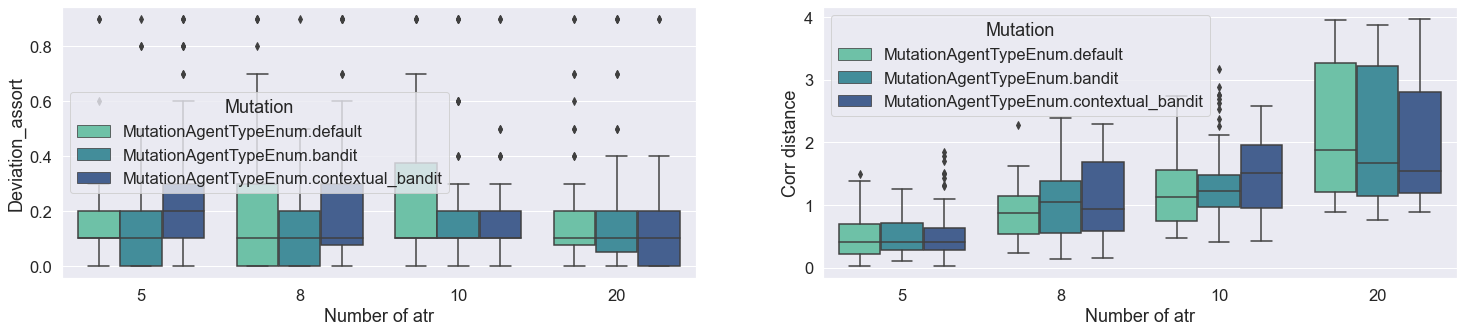

In [11]:
sns.set(font_scale=1.5)
palette = sns.color_palette("mako_r", 4)
fig, ax = plt.subplots(1,2, figsize=(25,5))
sns.boxplot(ax=ax[0], x='Number of atr', y='Deviation_assort', hue='Mutation', data=final_df, palette=palette)
sns.boxplot(ax=ax[1], x='Number of atr', y='Corr distance', hue='Mutation', data=final_df, palette=palette)
fig.savefig('mut_quality.pdf')

<AxesSubplot: xlabel='Number of atr', ylabel='Deviation_assort'>

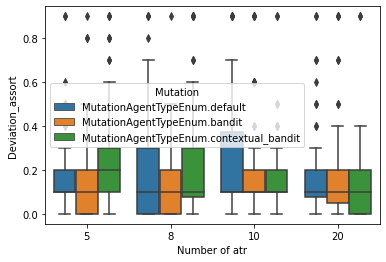

In [26]:
sns.boxplot(x='Number of atr', y='Deviation_assort', hue='Mutation', data=final_df)

<AxesSubplot: xlabel='Number of atr', ylabel='Corr distance'>

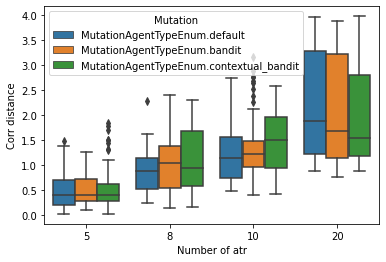

In [27]:
sns.boxplot(x='Number of atr', y='Corr distance', hue='Mutation', data=final_df)

In [28]:
number_of_atr = [5, 8, 10, 20]
p_edge = [0.05]
target_assort = [0.2, 0.9]
corr = ['low', 'high']
mutation_types = [MutationAgentTypeEnum.default, MutationAgentTypeEnum.bandit, MutationAgentTypeEnum.contextual_bandit]

for n in number_of_atr:
    history1 = []
    history2 = []
    history3 = []
    for cor in corr:
        for target in target_assort:
            for _ in range(5):
                dict1 = OptHistory.load('examples/BN_generator_learning/results/paper_cec/'+str(_)+' '+str(n)+' '+str(0.05)+' '+str(target)+' '+cor+' '+str(GeneticSchemeTypesEnum.steady_state)+' '+str(MutationAgentTypeEnum.default) + ' exp3_history.json')
                history1.append(dict1)
                
                dict2 = OptHistory.load('examples/BN_generator_learning/results/paper_cec/'+str(_)+' '+str(n)+' '+str(0.05)+' '+str(target)+' '+cor+' '+str(GeneticSchemeTypesEnum.steady_state)+' '+str(MutationAgentTypeEnum.bandit) + ' exp5_history.json')
                history2.append(dict2)

                dict3 = OptHistory.load('examples/BN_generator_learning/results/paper_cec/'+str(_)+' '+str(n)+' '+str(0.05)+' '+str(target)+' '+cor+' '+str(GeneticSchemeTypesEnum.steady_state)+' '+str(MutationAgentTypeEnum.contextual_bandit) + ' exp5_history.json')
                history3.append(dict3)
        
            fitn = MultipleFitnessLines.from_histories({'Mutation default':history1, 'Mutation bandit':history2, 'Mutation context-bandit':history3})
            fitn.visualize(metric_id=0, dpi=1000, save_path='examples/BN_generator_learning/results/paper_cec/'+str(n)+' '+str(0.05)+' compare_mutations_fig1.png')
            fitn.visualize(metric_id=1, dpi=1000, save_path='examples/BN_generator_learning/results/paper_cec/'+str(n)+' '+str(0.05)+' compare_mutations_fig2.png')
                        

FileNotFoundError: [Errno 2] No such file or directory: 'examples/BN_generator_learning/results/paper_cec/0 5 0.05 0.2 low GeneticSchemeTypesEnum.parameter_free MutationAgentTypeEnum.bandit exp5_history.json'

In [3]:
data = pd.read_csv('examples/BN_generator_learning/results/paper_cec/4 20 0.05 0.9 high 0.3 1.5 20 exp6.csv')
data

,Number of atr,P_edge,Target assort,Target correlation,Calculated_corr,Time,Deviation_assort,Corr_type,Cluster,Path length,Node degree
0,5,0.05,0.2,"[0.05013627991379632, 0.13631637899752372, 0.1...","[-0.19936694818838857, 0.3052135396020459, 0.3...",29,0.0,low,0.4,2.0,10
1,5,0.05,0.2,"[0.05013627991379632, 0.13631637899752372, 0.1...","[-0.14404040810615698, 0.519314570863808, 0.42...",29,0.0,low,0.4,2.0,10
2,5,0.05,0.2,"[0.05013627991379632, 0.13631637899752372, 0.1...","[-0.09877922750676849, 0.08269308436766912, 0....",29,0.1,low,0.4,2.0,10
3,5,0.05,0.9,"[0.05013627991379632, 0.13631637899752372, 0.1...","[-0.23786655172015134, 0.4564310585609149, 0.2...",85,0.0,low,0.4,2.0,10
4,5,0.05,0.9,"[0.05013627991379632, 0.13631637899752372, 0.1...","[-0.029892913587127708, 0.025715079254596235, ...",85,0.2,low,0.4,2.0,10
...,...,...,...,...,...,...,...,...,...,...,...
649,20,0.05,0.2,"[0.8703376869624857, 0.7068516519409678, 0.778...","[-0.1869859927649009, -0.03534679334682163, -0...",347,0.0,high,0.3,1.5,20
650,20,0.05,0.2,"[0.8703376869624857, 0.7068516519409678, 0.778...","[-0.1592988810729278, 0.2300806347161269, -0.1...",347,0.1,high,0.3,1.5,20
651,20,0.05,0.9,"[0.8703376869624857, 0.7068516519409678, 0.778...","[-0.07048148307773444, 0.14379195502051015, -0...",140,0.0,high,0.3,1.5,20
652,20,0.05,0.9,"[0.8703376869624857, 0.7068516519409678, 0.778...","[-0.07325475041299431, 0.4659675933288354, -0....",140,0.1,high,0.3,1.5,20


In [4]:
for i in data.index:
    origin_corr = ast.literal_eval(data.loc[i,'Target correlation'])
    calculated_corr = ast.literal_eval(data.loc[i,'Calculated_corr'])
    data.loc[i, 'Corr distance'] = distance.euclidean(origin_corr, calculated_corr)

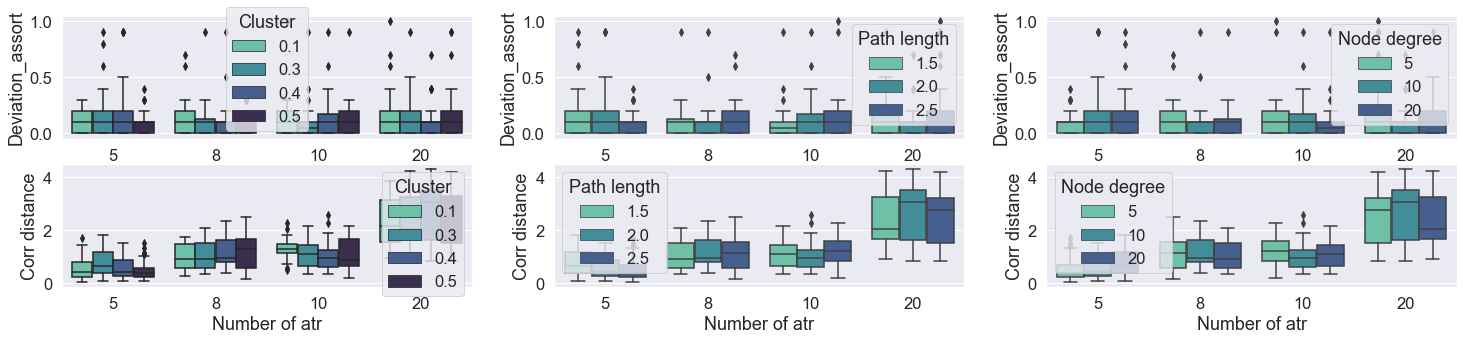

In [6]:
sns.set(font_scale=1.5)
palette = sns.color_palette("mako_r", 4)
fig, ax = plt.subplots(2,3, figsize=(25,5))
sns.boxplot(ax=ax[0,0], x='Number of atr', y='Deviation_assort', hue='Cluster', data=data, palette=palette)
sns.boxplot(ax=ax[0,1], x='Number of atr', y='Deviation_assort', hue='Path length', data=data, palette=palette)
sns.boxplot(ax=ax[0,2], x='Number of atr', y='Deviation_assort', hue='Node degree', data=data, palette=palette)
sns.boxplot(ax=ax[1,0], x='Number of atr', y='Corr distance', hue='Cluster', data=data, palette=palette)
sns.boxplot(ax=ax[1,1], x='Number of atr', y='Corr distance', hue='Path length', data=data, palette=palette)
sns.boxplot(ax=ax[1,2], x='Number of atr', y='Corr distance', hue='Node degree', data=data, palette=palette)
fig.savefig('different_dag_atr.pdf')